In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yahist

from utils.analysis import Validation

TAG = "STskim_nopresel"

In [2]:
babies = glob.glob(f"../analysis/studies/onelep/output_{TAG}/Run2/*.root")
babies = [baby for baby in babies if "VBSWH_mkW" not in baby]
babies

['../analysis/studies/onelep/output_STskim_nopresel/Run2/TTX.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/VH.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/WJets.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/SingleTop.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/Bosons.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output_STskim_nopresel/Run2/data.root']

In [3]:
vbswh = Validation(
    bkg_root_files=babies[:-1],
    data_root_files=babies[-1:],
    ttree_name="tree",
    weight_columns=["xsec_sf", "lep_sf"],
    plots_dir=f"/home/users/jguiang/public_html/onelep_plots/{TAG}/val"
)
vbswh.df["presel_noVBS_noBVeto"] = vbswh.df.eval(
    "hbbjet_score > 0.3"
)
vbswh.df["presel_noVBS"] = vbswh.df.eval(
    "passes_bveto and hbbjet_score > 0.3"
)
vbswh.df["presel_noDetaJJ"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and hbbjet_score > 0.3"
)
vbswh.df["presel"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and abs(deta_jj) > 3 and hbbjet_score > 0.3"
)

vbswh.df["regionA"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) > 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionB"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionC"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop < 150"
)
# vbswh.make_selection("passes_bveto == True")
# vbswh.make_selection(
#     "M_jj > 1500 and abs(deta_jj) > 4 and passes_bveto and ST > 1200 and hbbjet_msoftdrop > 150 and hbbjet_score < 0.9"
# )
# vbswh.make_selection(
#     "passes_bveto and hbbjet_score < 0.9"
# )
# vbswh.make_selection("passes_bveto != True")

In [35]:
# sel_to_plot = "presel_noDetaJJ and hbbjet_msoftdrop >= 150 and hbbjet_score > 0.9"
# sel_to_plot = "presel_noDetaJJ and M_jj > 1000 and ST > 1200 and hbbjet_score > 0.9 and (not (abs(deta_jj) > 4)) and (not (hbbjet_msoftdrop < 150))"
# sel_to_plot = "presel_noDetaJJ and M_jj > 600 and ST > 1400 and hbbjet_score > 0.9 and (not (abs(deta_jj) > 4)) and (not (hbbjet_msoftdrop < 150))"
sel_to_plot = "regionB and ST > 1500"

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/M_jj_data_vs_mc_regionB_and_ST_gt_1500.png


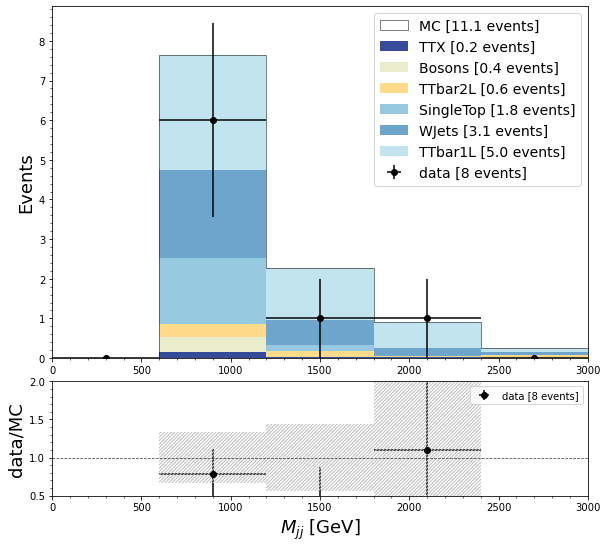

In [42]:
axes, _ = vbswh.plot_data_vs_mc(
    "M_jj", bins=np.linspace(0, 3000, 6), 
    selection=sel_to_plot,
    x_label=r"$M_{jj}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/ST_data_vs_mc_regionB_and_ST_gt_1500.png


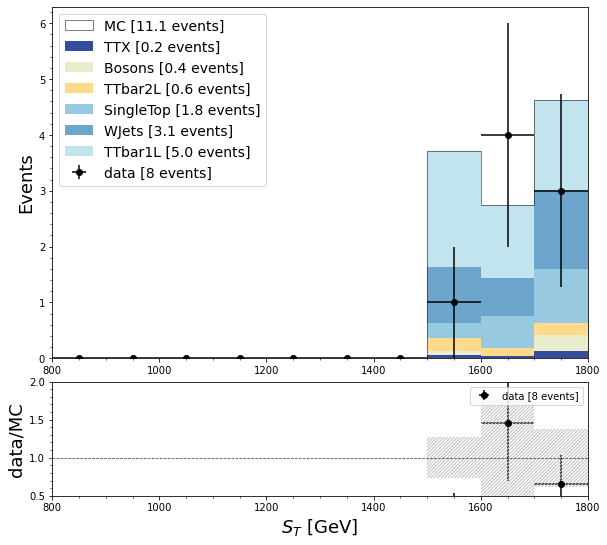

In [37]:
axes, _ = vbswh.plot_data_vs_mc(
    "ST", bins=np.linspace(800, 1800, 11), 
    selection=sel_to_plot,
    x_label=r"$S_T$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/deta_jj_data_vs_mc_regionB_and_ST_gt_1500.png


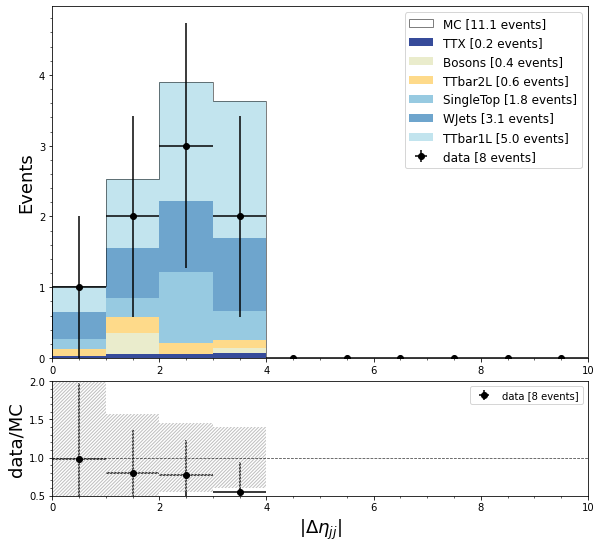

In [38]:
axes, _ = vbswh.plot_data_vs_mc(
    "deta_jj", bins=np.linspace(0,10,11), 
    selection=sel_to_plot,
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$",
#     norm=True,
    stacked=True
)
axes.legend(fontsize=12)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/M_jj_data_vs_mc_regionB_and_ST_gt_1500.png


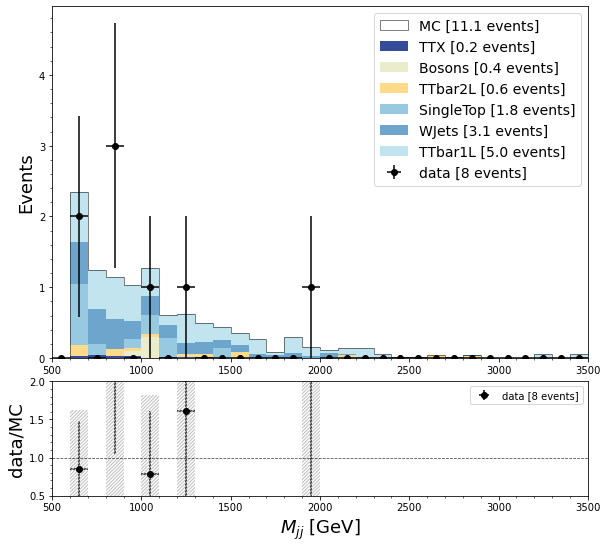

In [39]:
axes, _ = vbswh.plot_data_vs_mc(
    "M_jj", bins=np.linspace(500, 3500, 31), 
    selection=sel_to_plot,
    x_label=r"$M_{jj}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/deta_jj_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


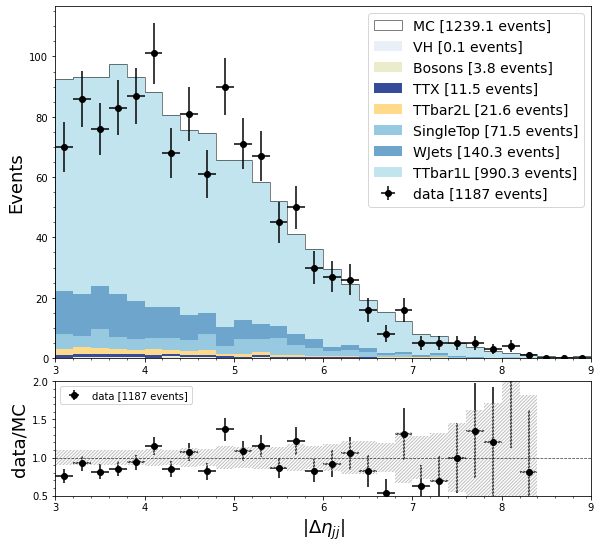

In [12]:
axes, _ = vbswh.plot_data_vs_mc(
    "deta_jj", bins=np.linspace(3,9,31), 
    selection=sel_to_plot,
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/hbbjet_score_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


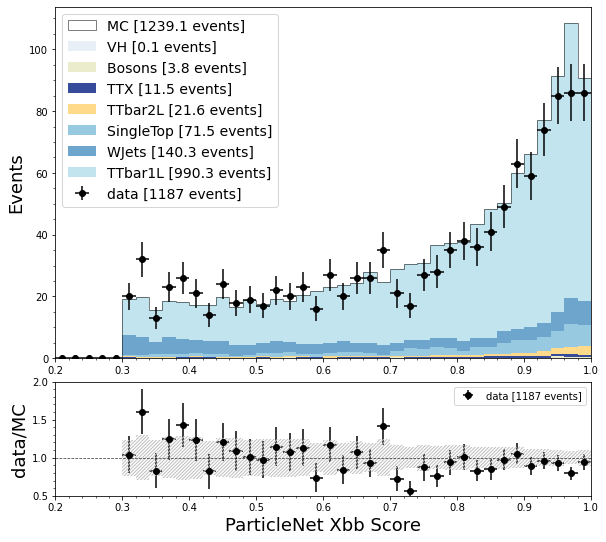

In [8]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_score", bins=np.linspace(0.2, 1.0, 41), 
    selection=sel_to_plot,
    x_label=r"ParticleNet Xbb Score",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/hbbjet_msoftdrop_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


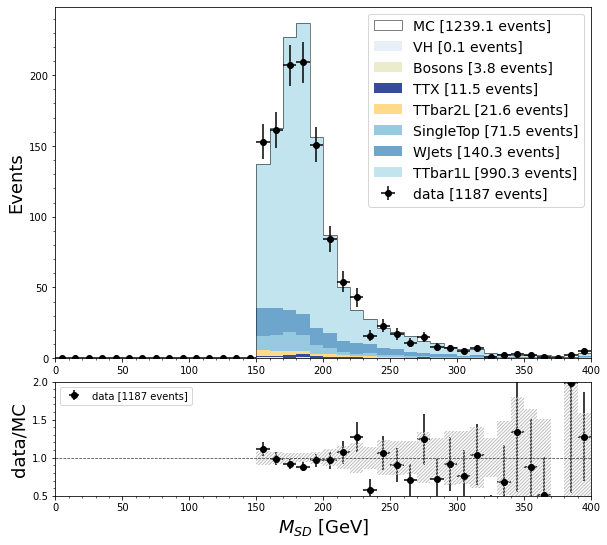

In [9]:
axes, _ = vbswh.plot_data_vs_mc(
    "hbbjet_msoftdrop", bins=np.linspace(0, 400, 41), 
    selection=sel_to_plot,
    x_label=r"$M_{SD}$ [GeV]",
#     norm=True,
    stacked=True
)

Wrote plot to /home/users/jguiang/public_html/onelep_plots/STskim_nopresel/val/ST_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


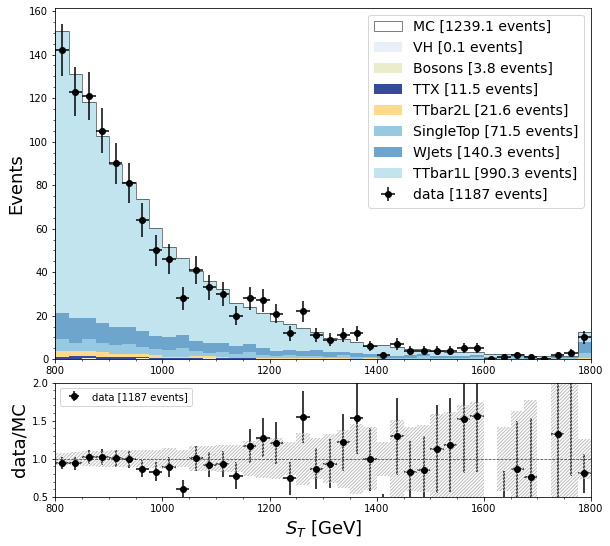

In [10]:
axes, _ = vbswh.plot_data_vs_mc(
    "ST", bins=np.linspace(800, 1800, 41), 
    selection=sel_to_plot,
    x_label=r"$S_T$ [GeV]",
#     norm=True,
    stacked=True
)